## Predict St Lucia Metal Roofs

Using rotated to hz + OpenCv border


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join
from ipyexperiments import *

In [3]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [4]:
data_dir = Path('data')
colombia_rural = Path('data/stac/colombia/borde_rural')
colombia_soacha = Path('data/stac/colombia/borde_soacha')

In [5]:
guatemala_mixco1 = Path('data/stac/guatemala/mixco_1_and_ebenezer')
guatemala_mixco3 = Path('data/stac/guatemala/mixco_3')

In [6]:
st_lucia_castries = Path('data/stac/st_lucia/castries')
st_lucia_dennery = Path('data/stac/st_lucia/dennery')
st_lucia_gros_islet = Path('data/stac/st_lucia/gros_islet')

In [7]:
COUNTRY='colombia'
REGION='borde_rural'
DATASET = f'{COUNTRY}_{REGION}'
DATASET_PATH=colombia_rural
path=data_dir/f'{COUNTRY}_{REGION}/cropped/'
TRAIN_JSON = f'train-{REGION}.geojson'
TEST_JSON = f'test-{REGION}.geojson'

In [8]:
RESIZE_IMAGES = True

In [9]:
MODEL_NAME='cv_reflect_101'

In [10]:
NB_NUM='10_1'
RUN='0'

In [11]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: 246f19ab, DATE: 20191124


In [12]:
#DATE = '20191124'
#UID = '1328c588'

In [13]:
SUB_NUM='2'

In [14]:
img_size=256
bs=128

In [15]:
train_images=data_dir/f'train/rotated/clipped/{img_size}'
test_images=data_dir/f'test/rotated/clipped/{img_size}'

#### useing only gold st_lucia cement

In [16]:
df_all=pd.read_csv(data_dir/'df_all_repl_st_lucia_castries_gold_concrete_cement.csv')

In [17]:
df_all.tail()

,country,id,region,roof_material,target,verified
22534,st_lucia,7a3585be,castries,concrete_cement,NaN,True
22535,st_lucia,7a1d3324,castries,concrete_cement,NaN,True
22536,st_lucia,7a30849c,castries,concrete_cement,NaN,True
22537,st_lucia,7a27186c,castries,concrete_cement,NaN,True
22538,st_lucia,7a34ef78,castries,concrete_cement,NaN,True


In [18]:
df_all.drop(columns=['target'],inplace=True)

In [19]:
df_metal=df_all.loc[df_all['roof_material'].isin(['irregular_metal','healthy_metal'])]

In [20]:
df_metal['target']=df_metal['roof_material']+'_'+df_metal['region']

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_metal['roof_country']=df_metal['roof_material']+'_'+df_metal['country']

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


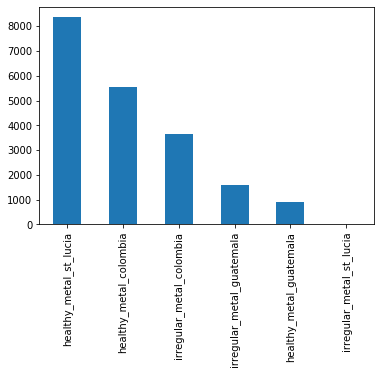

In [24]:
df_metal.roof_country.value_counts().plot(kind='bar')

In [25]:
df_metal.head()

,country,id,region,roof_material,verified,target,roof_country
1,colombia,7a1f731e,borde_rural,irregular_metal,True,irregular_metal_borde_rural,irregular_metal_colombia
2,colombia,7a424ad8,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
3,colombia,7a3edc5e,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
4,colombia,7a303a6e,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
5,colombia,7a1eb2bc,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia


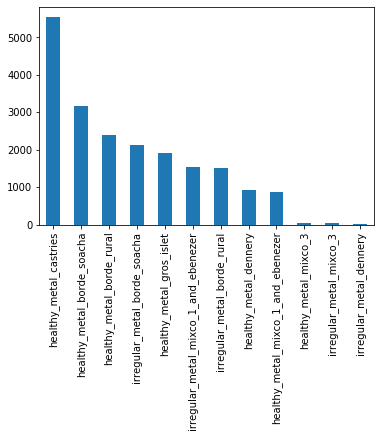

In [26]:
df_metal.target.value_counts().plot(kind='bar')

In [30]:
df_metal.groupby('target').count()

,country,id,region,roof_material,verified,roof_country
target,,,,,,
healthy_metal_borde_rural,2383,2383,2383,2383,2383,2383
healthy_metal_borde_soacha,3161,3161,3161,3161,3161,3161
healthy_metal_castries,5535,5535,5535,5535,5535,5535
healthy_metal_dennery,923,923,923,923,923,923
healthy_metal_gros_islet,1901,1901,1901,1901,1901,1901
healthy_metal_mixco_1_and_ebenezer,863,863,863,863,863,863
healthy_metal_mixco_3,51,51,51,51,51,51
irregular_metal_borde_rural,1508,1508,1508,1508,1508,1508
irregular_metal_borde_soacha,2124,2124,2124,2124,2124,2124


In [37]:
df_unverified = df_metal.loc[df_metal['verified'] == False]

In [31]:
df_verified = df_metal.loc[df_metal['verified'] == True]

In [34]:
df_verified.head()

,country,id,region,roof_material,verified,target,roof_country
1,colombia,7a1f731e,borde_rural,irregular_metal,True,irregular_metal_borde_rural,irregular_metal_colombia
2,colombia,7a424ad8,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
3,colombia,7a3edc5e,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
4,colombia,7a303a6e,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia
5,colombia,7a1eb2bc,borde_rural,healthy_metal,True,healthy_metal_borde_rural,healthy_metal_colombia


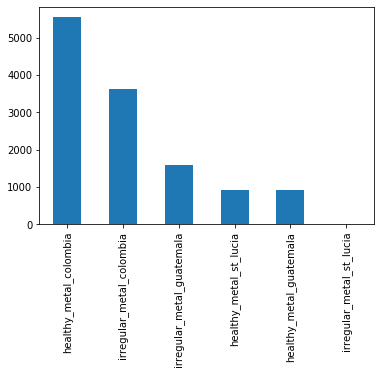

In [32]:
df_verified.roof_country.value_counts().plot(kind='bar')

In [35]:
df_verified.groupby('roof_country').count()

,country,id,region,roof_material,verified,target
roof_country,,,,,,
healthy_metal_colombia,5544,5544,5544,5544,5544,5544
healthy_metal_guatemala,914,914,914,914,914,914
healthy_metal_st_lucia,923,923,923,923,923,923
irregular_metal_colombia,3632,3632,3632,3632,3632,3632
irregular_metal_guatemala,1587,1587,1587,1587,1587,1587
irregular_metal_st_lucia,22,22,22,22,22,22


In [41]:
list(set(df_verified.roof_country.values.tolist()))

['irregular_metal_colombia',
 'healthy_metal_guatemala',
 'healthy_metal_st_lucia',
 'irregular_metal_st_lucia',
 'healthy_metal_colombia',
 'irregular_metal_guatemala']

In [36]:
df_verified.groupby('target').count()

,country,id,region,roof_material,verified,roof_country
target,,,,,,
healthy_metal_borde_rural,2383,2383,2383,2383,2383,2383
healthy_metal_borde_soacha,3161,3161,3161,3161,3161,3161
healthy_metal_dennery,923,923,923,923,923,923
healthy_metal_mixco_1_and_ebenezer,863,863,863,863,863,863
healthy_metal_mixco_3,51,51,51,51,51,51
irregular_metal_borde_rural,1508,1508,1508,1508,1508,1508
irregular_metal_borde_soacha,2124,2124,2124,2124,2124,2124
irregular_metal_dennery,22,22,22,22,22,22
irregular_metal_mixco_1_and_ebenezer,1540,1540,1540,1540,1540,1540


In [40]:
list(set(df_verified.target.values.tolist()))

['healthy_metal_mixco_1_and_ebenezer',
 'irregular_metal_mixco_1_and_ebenezer',
 'healthy_metal_mixco_3',
 'irregular_metal_borde_rural',
 'healthy_metal_borde_rural',
 'irregular_metal_borde_soacha',
 'healthy_metal_dennery',
 'irregular_metal_dennery',
 'irregular_metal_mixco_3',
 'healthy_metal_borde_soacha']

In [38]:
df_unverified.groupby('roof_country').count()

,country,id,region,roof_material,verified,target
roof_country,,,,,,
healthy_metal_st_lucia,7436,7436,7436,7436,7436,7436


In [39]:
df_unverified.groupby('target').count()

,country,id,region,roof_material,verified,roof_country
target,,,,,,
healthy_metal_castries,5535,5535,5535,5535,5535,5535
healthy_metal_gros_islet,1901,1901,1901,1901,1901,1901


In [25]:
### Test is unverified St Lucia Metal

In [26]:
df_test=df_all.loc[df_all['roof_material'].isin(['irregular_metal','healthy_metal'])]

In [27]:
df_test = df_test.loc[df_test['verified'] == False]

In [28]:
df_test.tail()

,country,id,region,roof_material,verified
22459,st_lucia,7a22ddec,gros_islet,healthy_metal,False
22460,st_lucia,7a2f73ea,gros_islet,healthy_metal,False
22461,st_lucia,7a34ffa4,gros_islet,healthy_metal,False
22462,st_lucia,7a41560a,gros_islet,healthy_metal,False
22463,st_lucia,7a283ad0,gros_islet,healthy_metal,False


In [31]:
#df_test.to_csv('df_st_lucia_healthy-irregular_meltal_unverified.csv', index=False)

In [32]:
test_ids=df_test['id'].values.tolist()

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [33]:
xtra_tfms=[rand_crop(p=0.4)] 
tfms = get_transforms(flip_vert=True, max_lighting=0.25, max_zoom=1.2, max_warp=0., xtra_tfms=xtra_tfms)

#tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

### setup dataset

In [38]:
np.random.seed(42)
dep_var='target'
src = (ImageList.from_df(path=train_images, df=df_verified, cols='id', suffix='.tif')
       .split_by_rand_pct(0.1)
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

12622


In [39]:
data = (src.transform(tfms, size=img_size)
        .databunch(bs=bs).normalize(imagenet_stats))

In [40]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

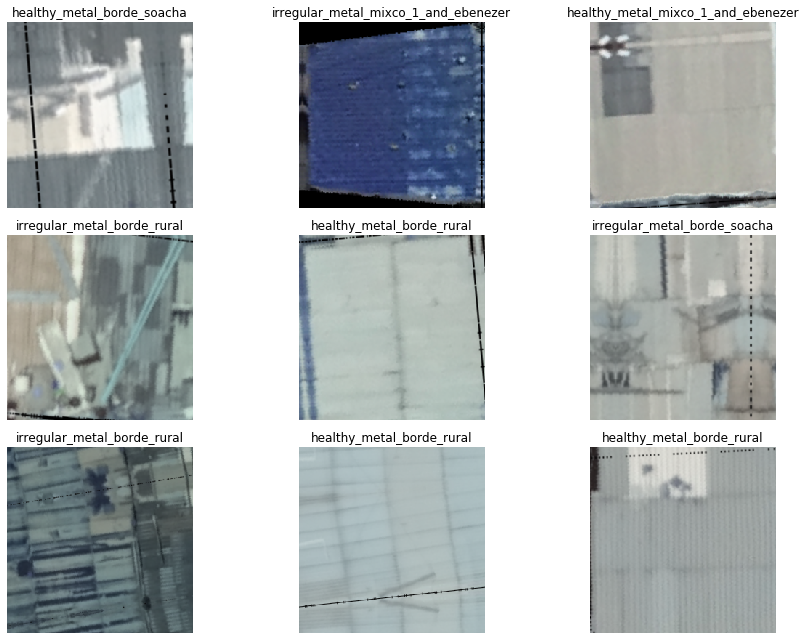

In [41]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [42]:
arch = models.resnet50
arch_name = 'rn50'

In [43]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

### Train model

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


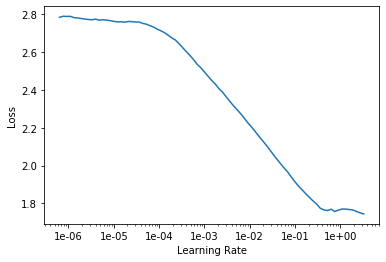

In [45]:
learn.recorder.plot()

Then we can fit the head of our network.

In [46]:
lr = 1e-2

In [47]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.353320,0.829032,0.278130,00:31
1,0.893134,0.630701,0.225832,00:30
2,0.688128,0.575783,0.211569,00:30
3,0.603400,0.546210,0.194929,00:30
4,0.552639,0.549038,0.197306,00:30


In [49]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

In [50]:
print(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

stage-1-rn50-10_1-cv_reflect_101-20191124-018230e8_0


In [51]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.557339,0.552128,0.206022,00:30
1,0.576270,0.584880,0.213946,00:36
2,0.537767,0.516274,0.190967,00:35
3,0.496767,0.493015,0.184628,00:36
4,0.461207,0.483591,0.182250,00:37


In [52]:
learn.save(f'stage-1-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

#### Load model

In [62]:
learn.load(f'stage-1-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

Learner(data=ImageDataBunch;

Train: LabelList (11360 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural
Path: data/train/rotated/clipped/256;

Valid: LabelList (1262 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal_borde_soacha,irregular_metal_mixco_1_and_ebenezer,healthy_metal_borde_soacha,healthy_metal_borde_soacha,healthy_metal_borde_soacha
Path: data/train/rotated/clipped/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal_borde_soacha', 'healthy_metal_borde_soacha', 45),
 ('healthy_metal_borde_soacha', 'irregular_metal_borde_soacha', 33),
 ('irregular_metal_borde_rural', 'healthy_metal_borde_rural', 30),
 ('healthy_metal_borde_rural', 'irregular_metal_borde_rural', 24),
 ('healthy_metal_borde_soacha', 'healthy_metal_borde_rural', 20),
 ('healthy_metal_borde_rural', 'healthy_metal_borde_soacha', 13),
 ('irregular_metal_borde_rural', 'irregular_metal_borde_soacha', 13),
 ('irregular_metal_mixco_1_and_ebenezer',
  'healthy_metal_mixco_1_and_ebenezer',
  12),
 ('healthy_metal_mixco_1_and_ebenezer',
  'irregular_metal_mixco_1_and_ebenezer',
  9),
 ('irregular_metal_borde_rural', 'healthy_metal_borde_soacha', 6),
 ('irregular_metal_borde_soacha', 'irregular_metal_borde_rural', 6),
 ('healthy_metal_borde_soacha', 'irregular_metal_borde_rural', 3),
 ('healthy_metal_mixco_3', 'healthy_metal_mixco_1_and_ebenezer', 3),
 ('healthy_metal_borde_soacha', 'healthy_metal_dennery', 2),
 ('irregular_met

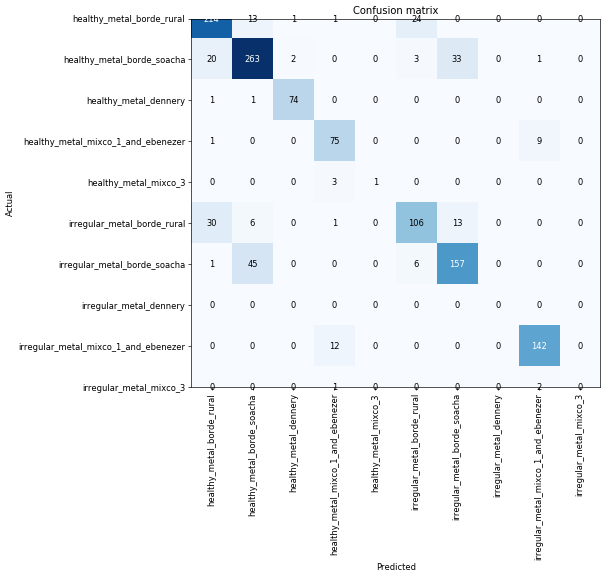

In [55]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

### Re-train

In [56]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


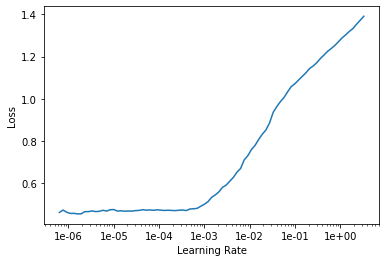

In [57]:
learn.lr_find()
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(5, slice(5e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.473535,0.490075,0.187005,00:42
1,0.487310,0.503714,0.192552,00:46
2,0.448530,0.473631,0.187005,00:45
3,0.393432,0.463770,0.175119,00:45
4,0.349653,0.448288,0.175119,00:46


In [59]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

In [64]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}_{RUN}')

Learner(data=ImageDataBunch;

Train: LabelList (11360 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural,healthy_metal_borde_rural
Path: data/train/rotated/clipped/256;

Valid: LabelList (1262 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal_borde_soacha,irregular_metal_mixco_1_and_ebenezer,healthy_metal_borde_soacha,healthy_metal_borde_soacha,healthy_metal_borde_soacha
Path: data/train/rotated/clipped/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [61]:
#learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.349037,0.445054,0.165610,00:36
1,0.347308,0.477084,0.191759,00:38
2,0.319781,0.469529,0.179081,00:38
3,0.280591,0.486435,0.175119,00:39
4,0.245598,0.488029,0.182250,00:36


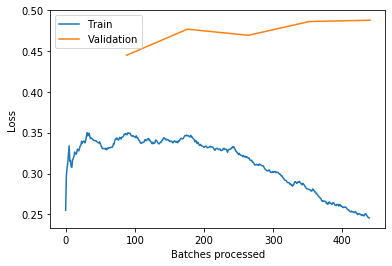

In [63]:
learn.recorder.plot_losses()

In [79]:
#learn.save(f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [65]:
learn = learn.to_fp32()

In [66]:
learn.export()

#### Inference

see 10_metal-country_pred_st_lucia_20191124.py